## 1. INTRODUCTION

In this study, I will give you an example of EDA (Exploratory Data analysis) and I will make an analysis of the various Regression algorithms in Machine Learning. In this analysis, I will use the "Medical Cost Personal Datasets" dataset. In this dataset, 1338 people have anonymous information. In addition, annual insurance premiums given to these people are also included in the dataset. We will create and test regression models that estimate their annual premiums based on their other information. Then we will discuss the results and see which algorithm is successful. We will also perform visualization using various data in dataset.


1. INTRODUCTION
2. USED LIBRARIES
3. DATA EXPLORATION
    * 3.1. Detailed Information of the Dataset
    * 3.2. Correlation of Columns(Attributes)
    * 3.3. Various Visualizations from Dataset
4. DATA PREPARATION AND CLEANING
    * 4.1. Drop Irrelevant Columns
    * 4.2. Correction of Column(Attribute) Names
    * 4.3. Split Data and Target
    * 4.4. Handling Missing Values
    * 4.5. Type Conversions and Encoding
    * 4.6. Preparation of Test and Train Data
    * 4.7. Normalization of Data
* 5. BUILDING MODELS
    * 5.1. Multiple Linear Regression
    * 5.2. Polynomial Regression
* 6. EVALUATING MODELS
    * 6.1. Evaluating Multiple Linear Regression Model
    * 6.2. Evaluating Polynomial Regression Model
* 7. EXPLORATION OF RESULTS
* 8. CONCLUSION

## 2. Importing LIBRARIES



In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

In [2]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="3"></a> <br>
## 3. DATA EXPLORATION

In this section, various explanations will be made about dataset.

<a id="31"></a> <br>
### 3.1. Detailed Information of the Dataset

Here we will import the dataset first. Then, we will explain the columns(features) of the dataset one by one.

In [3]:
data = pd.read_csv('/content/drive/My Drive/Corizo/Class 10 27052024/insurance.csv')  # Read CSV file and load into "data" variable
data.info()  # Show detailed information for dataset columns(attributes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


As you can see from the output here, there are 1338 rows so record. There are also 7 columns(attributes). Fortunately, our dataset doesn't have any missing values. In other words, all the columns of all rows are filled with data. The rows are also indexed from 0 to 1337. Now, let's explain what the columns mean:

* **age :** Indicates the age of the person. It contains data of type "_int64_".
* **sex :** It refers to the gender of the person. It contains "_object_" type data.
* **bmi :** It refers to the Body Mass Index of the person and contains the data of type "_float64_". BMI is a measure of the weight of a person, divided by the square of its length. Determines the person's obesity value. The formula for USA and METRIC units is as follows:
![](https://i2.wp.com/www.marathonnewbie.com/wp-content/uploads/2016/07/body-mass-index-formula.jpg)
* **children :** It refers to the number of children that a person has. It contains data of type "_int64_".
* **smoker :** Indicates whether the person smokes or not. It contains "_object_" type data.
* **region :** Specifies which region the person is from. It contains "_object_" type data.
* **charges :** The person's total insurance premium is specified. Although not specified, it is assumed to be in dollars ($). It contains "__float64__" type data.

We gave the necessary information about dataset. Now, looking at the first 5 and last 5 entries of dataset, what are the values that are being held:

In [ ]:
data.head()  # Print first 5 entry of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()  # Prints last 5 entries of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


There is no problem with numeric data. However, we may need to apply numerical transformation in the future for categorical data of type "object". Now let's see the various statistics about the numeric data:

In [6]:
data.describe()  # Print table which contain statistical data of the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<a id="32"></a> <br>
### 3.2. Correlation of Columns(Attributes)

In this section, we'll find the correlation matrix between the columns and we'll visualize it into a Heatmap. In this way, we will be able to see the relationship between the attributes more clearly and visualize them in the future.

In [7]:
corr = data[['age','bmi','children','charges']].corr()  # Prints correlation matrix for the numerical columns
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Correlation is a number that indicates how the two attributes are related to each other. As this number approaches 1.0, the relationship is strengthened in the right direction. As it approaches -1.0, it is strengthened in the opposite direction. If this value is close to zero, the bond between the two data is weak. For example in the above matrix, we see a little (but no more) bound with person's age and charge values. Other bounds are so weak. Now we visualize this correlation matrix with Heatmap:

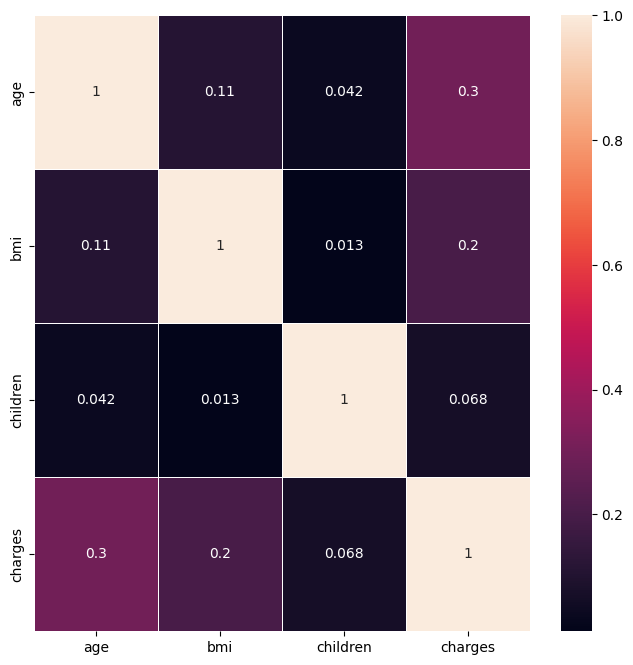

In [8]:
fig, axes = plt.subplots(figsize=(8, 8))  # This method creates a figure and a set of subplots
sns.heatmap(data=corr, annot=True, linewidths=.5, ax=axes)  # Figure out heatmap
# Parameters:
# data : 2D data for the heatmap.
# annot : If True, write the data value in each cell.
# linewidths : Width of the lines that will divide each cell.
# ax : Axes in which to draw the plot, otherwise use the currently-active Axes.
plt.show()  # Shows only plot and remove other informations

<a id="33"></a> <br>
### 3.3. Various Visualizations from Dataset

In this section, we will make various visualizations related to dataset and after understanding the connection between the data in dataset we will move to the next section. Let's look at the distribution of numerical attributes:

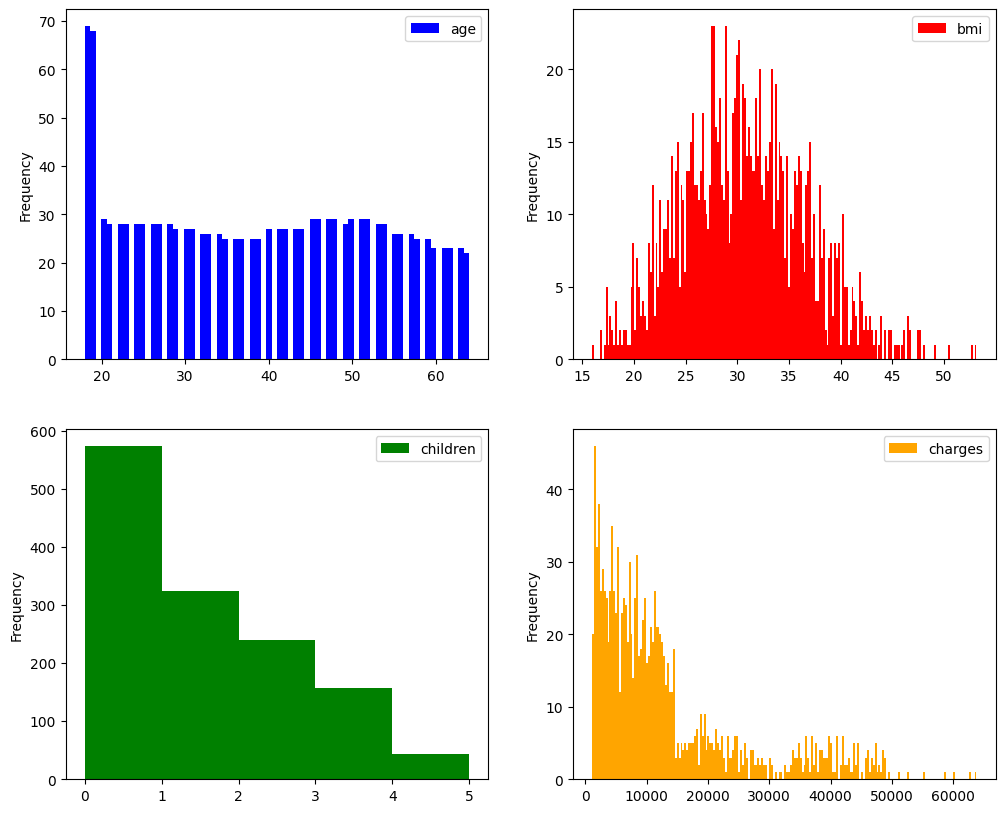

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=200, color="r", ax=axes[0][1])
data.plot(kind="hist", y="children", bins=5, color="g", ax=axes[1][0])
data.plot(kind="hist", y="charges", bins=200, color="orange", ax=axes[1][1])
plt.show()

We can make inferences from these images. For example, the number of children who have no children in the dataset is more than the others. In addition, the total charge amount usually looks less than 20000. Now look at the male and female numbers in dataset:

<ipython-input-10-3c7ca644ef46>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="sex", kind="count", palette="Set1", data=data)


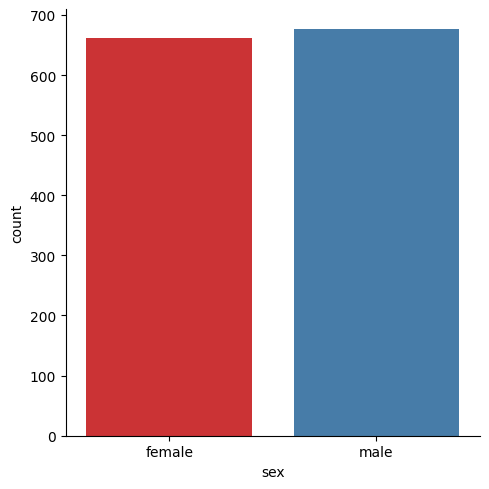

In [10]:
sns.catplot(x="sex", kind="count", palette="Set1", data=data)

Since the value we will examine as an output here is "_charges_", we need to examine the relationship of the other columns with it. To do this, let's draw Scatter Plots between the numeric columns and the "_charges_" column:

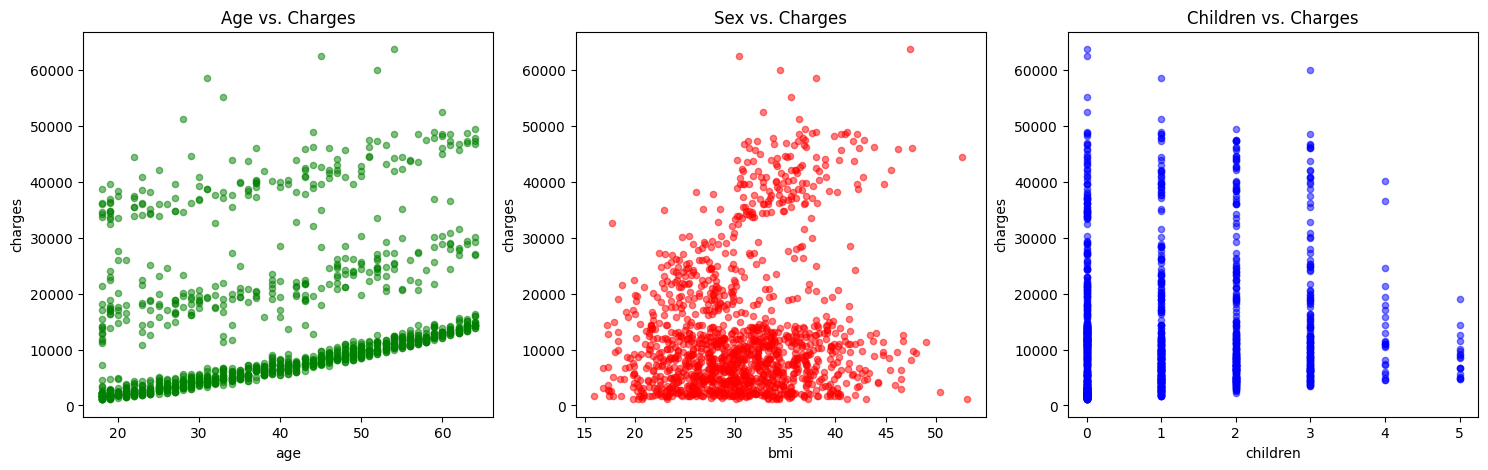

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
data.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
data.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="Sex vs. Charges")
data.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

Finally, look at the distribution of smokers and non-smokers in the BMI vs. Charges Scatter Plot:

<Axes: xlabel='bmi', ylabel='charges'>

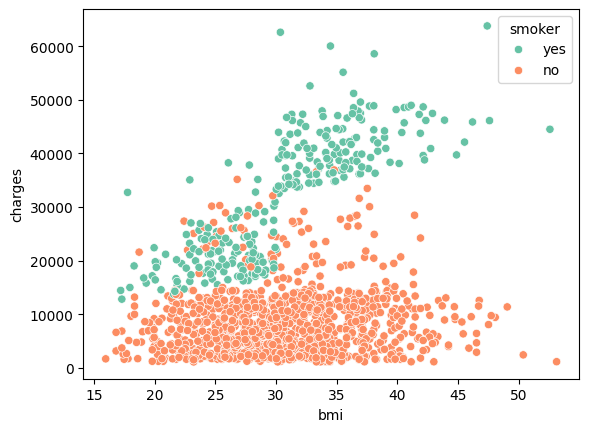

In [12]:
sns.scatterplot(x="bmi", y="charges", data=data, palette='Set2', hue='smoker')

<a id="4"></a> <br>
## 4. DATA PREPARATION AND CLEANING

In this section, we will be able to use various preprocesses in order to use the data correctly. First, let us explain what data will be used as a target. Here we will use "age", "sex", "bmi", "children" and "smoker" columns as data ie X. We will use "charges" column as the target ie Y. We will drop the "region" column from this dataset. Because we haven't done much analysis about it, so we can slow down our process. Now, let's do the related operations one by one.

<a id="41"></a> <br>
### 4.1. Drop Irrelevant Columns

In this section, we will delete the columns that will not work for us from the dataset. Here is the only one we will not use the column is "_region_", so we just need to delete it:

In [13]:
data.drop(["region"], axis=1, inplace=True)  # Drop "region" column from dataset

<a id="42"></a> <br>
### 4.2. Correction of Column(Attribute) Names

In this section we will use more readable column names instead existing column names if there are spaces and unwanted characters. There is no problem with column names in the dataset we use. But in order to show how the process is done, I'll change them all to the name I want and all to be capitalized:

In [14]:
data.rename(columns={"age" : "AGE", "sex" : "GENDER", "bmi" : "BMI", "children" : "CHILDREN", "smoker": "SMOKER", "charges" : "CHARGES"}, inplace=True)
data.columns

Index(['AGE', 'GENDER', 'BMI', 'CHILDREN', 'SMOKER', 'CHARGES'], dtype='object')

<a id="43"></a> <br>
### 4.3. Split Data and Target

We can't give the whole dataset to the model as it is. First we need to set the data and target part of it. Here, the data part is called X, while the target part is called Y. Now split the data and target partitions and assign each of them to variables named X and Y:

In [15]:
X = data.drop(["CHARGES"], axis=1)  # Put all data (except "__CHARGES__" column) to the X variable
y = data.CHARGES.values  # Put only "__CHARGES__" column to the Y variable

<a id="44"></a> <br>
### 4.4. Handling Missing Values

There is no missing value in this dataset. Therefore, we do not have any action here.

<a id="45"></a> <br>
### 4.5. Type Conversions and Encoding

Here we will convert categorical data into numeric data. In our dataset, categorical columns are gender and smoking. We will convert them numerically:

* **GENDER :** If "male" is 0, "female" is 1.
* **SMOKER :** If "no" is 0, "yes" is 1.

In [16]:
X.GENDER = [1 if each == "female" else 0 for each in X.GENDER]
X.SMOKER = [1 if each == "yes" else 0 for each in X.SMOKER]
X.head()

,AGE,GENDER,BMI,CHILDREN,SMOKER
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


<a id="47"></a> <br>
### 4.6. Preparation of Test and Train Data

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "_train_test_split_" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [17]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

In [18]:
x_train.head()

,AGE,GENDER,BMI,CHILDREN,SMOKER
560,46,1,19.95,2,0
1285,47,1,24.32,0,0
1142,52,1,24.86,0,0
969,39,1,34.32,5,0
486,54,1,21.47,3,0


<a id="46"></a> <br>
### 4.7 Normalization of Data

The values of the data may be so far from each other. This can sometimes lead to undesirable situations in regression algorithms. Therefore, we need to normalize the data.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the 'bmi' column in x_train and transform it
x_train['BMI'] = scaler.fit_transform(x_train[['BMI']])

# Transform the 'bmi' column in x_test using the same scaler
x_test['BMI'] = scaler.transform(x_test[['BMI']])

# Fit the scaler to the 'bmi' column in x_train and transform it
x_train['AGE'] = scaler.fit_transform(x_train[['AGE']])

# Transform the 'bmi' column in x_test using the same scaler
x_test['AGE'] = scaler.transform(x_test[['AGE']])

# Fit the scaler to the 'bmi' column in x_train and transform it
x_train['CHILDREN'] = scaler.fit_transform(x_train[['CHILDREN']])

# Transform the 'bmi' column in x_test using the same scaler
x_test['CHILDREN'] = scaler.transform(x_test[['CHILDREN']])

In [20]:
x_train.head()

,AGE,GENDER,BMI,CHILDREN,SMOKER
560,0.608696,1,0.107345,0.4,0
1285,0.630435,1,0.224913,0.0,0
1142,0.739130,1,0.239440,0.0,0
969,0.456522,1,0.493947,1.0,0
486,0.782609,1,0.148238,0.6,0


As you can see, the values were normalized between 0 and 1. Now let's take our Train and Test data and finish this part.

<a id="5"></a> <br>
## 5. BUILDING MODELS

In this section, we will build regression models and fit them wit data. The regression algorithms used in this section are:

1. Multiple Linear Regression
2. Polynomial Regression

<a id="51"></a> <br>
### 5.1. Multiple Linear Regression

Create the Multiple Linear Regression model and fit the data:

In [21]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(x_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

<a id="52"></a> <br>
### 5.2. Polynomial Regression

In the Polynomial Regression model, we must first convert the data to the specified degree as a polynomial feature. For this, we will take advantage of the PolynomialFeatures class of the Scikit-Learn library. Now we will use the X data for training and testing as a polynomial feature and perform the fit process:

In [24]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(x_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.transform(x_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

<a id="6"></a> <br>
## 6. EVALUATING MODELS

In this section we will do some measurements to evaluate the performance on the models we fit. In addition, 10-Fold Cross Validation method will perform the validation process. R Squared Score method will be used for calculating the accuracy of the models. Mean Squared Error (MSE) method will be used for error measurement. As the MSE result can be very large, its square root will be taken and converted into RMSE. The error and accuracy calculation shall be performed on both the test and training dataset. Let's first perform evaluation for each model by importing the necessary functions:

In [22]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

<a id="61"></a> <br>
### 6.1. Evaluating Multiple Linear Regression Model

In [23]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  0.7377125164037337
Testing Accuracy for Multiple Linear Regression Model:  0.7763297304887649
RMSE for Training Data:  6152.796315105857
RMSE for Testing Data:  5892.75195592368
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.717113419200113


<a id="62"></a> <br>
### 6.2. Evaluating Polynomial Regression Model

In [25]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8440044461603674
Testing Accuracy for Polynomial Regression Model:  0.8640001614931052
RMSE for Training Data:  4745.03986191281
RMSE for Testing Data:  4594.975779183332
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8391072917692678


<a id="7"></a> <br>
## 7. EXPLORATION OF RESULTS

In general, let's put all the results of the models into the table:

In [26]:
training_accuracies = [accuracy_MLR_train, accuracy_PR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR]

table_data = {"Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies,
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression",]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,0.737713,0.77633,6152.796315,5892.751956,0.717113
Polynomial Regression,0.844004,0.86400,4745.039862,4594.975779,0.839107


Now let's compare the training and testing accuracy of each model:

<a id="8"></a> <br>
## 8. CONCLUSION

This kernel is designed to completely illustrate regression and EDA stages in machine learning. You can use the code and information in the example as desired. But please use his license to use the dataset. In this kernel, we tried to get information about:

* Data Science processes
* How a Dataset Exploratory Data Analysis (EDA) is made
* Find and visualize the correlation between features in data
* How to make various visualizations about dataset
* Use of libraries such as Pandas, Matplotlib, Seaborn and Scikit-Learn in Python
* How to do Data Cleaning simply
* How to split Dataset into Test and Train
* How to install and learn Machine Learning models
* How polynomial is made in Polynomial Regression
* How to do the Evaluating on the installed models
* How the R-Squared Score is located
* How RMSE values are located
* How K-Fold Cross Validation is done and how the score is calculated
* How the models evaluated are visually compared and interpreted
